<a href="https://colab.research.google.com/github/ayushpradhananga/Booking-Cancellation_Analysis/blob/main/Booking_cancellation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing / Installing packages

In [1]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

# Loading the Raw Data





In [2]:
# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/ayushpradhananga/Booking-Cancellation_Analysis/main/VS_Booking.csv?token=GHSAT0AAAAAACJ2F3NJYVQPVFM7FP7KUGAGZK44A4A'
vs_booking = pd.read_csv(url)

# Print dataset information
print('Sample size:', vs_booking.shape[0])
print('Number of columns:', vs_booking.shape[1])


Sample size: 32647
Number of columns: 17


# Exploratory Data Analysis

In [3]:
#explore the dataset
vs_booking.head(5)

,Booking_ID,RoomType,FromDate,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status
0,INN14254,Neptune,3/10/2018,2,0,Buffet Breakfast,1,0,1,3,0,219,Online,0,0,102.85,Canceled
1,INN16192,Venus,30/12/2018,2,0,Buffet Breakfast,1,0,2,2,0,23,Online,0,0,133.55,Arrived
2,INN04354,Neptune,19/8/2018,2,0,Buffet Breakfast,1,0,2,3,0,303,Offline,0,0,78.00,Arrived
3,INN01119,Venus,15/8/2018,2,0,Buffet Breakfast,0,0,1,2,0,133,Online,0,0,113.60,Canceled
4,INN17611,Neptune,31/8/2018,1,0,Buffet Breakfast,0,0,0,2,0,70,Online,0,0,121.50,Canceled


In [4]:
#check missing values
vs_booking.isnull().sum()

Booking_ID                    0
RoomType                      0
FromDate                      0
Adults                        0
Children                      0
Breakfast                     0
Number of Special Requests    0
Airport Pickup                0
Weekend Nights                0
Weeknights                    0
Loyalty Points                0
Lead time in days             0
Booking Type                  0
Existing Customer             0
Previous Cancellations        0
Average Room Price            0
Booking Status                0
dtype: int64

In [5]:
#check data type
vs_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32647 entries, 0 to 32646
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Booking_ID                  32647 non-null  object 
 1   RoomType                    32647 non-null  object 
 2   FromDate                    32647 non-null  object 
 3   Adults                      32647 non-null  int64  
 4   Children                    32647 non-null  int64  
 5   Breakfast                   32647 non-null  object 
 6   Number of Special Requests  32647 non-null  int64  
 7   Airport Pickup              32647 non-null  int64  
 8   Weekend Nights              32647 non-null  int64  
 9   Weeknights                  32647 non-null  int64  
 10  Loyalty Points              32647 non-null  int64  
 11  Lead time in days           32647 non-null  int64  
 12  Booking Type                32647 non-null  object 
 13  Existing Customer           326

In [6]:
vs_booking.describe()

,Adults,Children,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Existing Customer,Previous Cancellations,Average Room Price
count,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000,32647.000000
mean,1.844947,0.104604,0.619567,0.031060,0.810610,2.208289,0.152265,85.419549,0.025546,0.022820,103.513175
std,0.519577,0.402763,0.785970,0.173481,0.872816,1.416201,1.716329,86.194930,0.157779,0.362589,35.125494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,80.300000
50%,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,99.460000
75%,2.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,127.000000,0.000000,0.000000,120.000000
max,4.000000,10.000000,5.000000,1.000000,7.000000,17.000000,58.000000,443.000000,1.000000,13.000000,540.000000


# Data Cleaning



In [7]:
#Dropping irrelevant features
vs_booking = vs_booking.drop(['Booking_ID','FromDate'], axis =1)

In [8]:
vs_booking.head()

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status
0,Neptune,2,0,Buffet Breakfast,1,0,1,3,0,219,Online,0,0,102.85,Canceled
1,Venus,2,0,Buffet Breakfast,1,0,2,2,0,23,Online,0,0,133.55,Arrived
2,Neptune,2,0,Buffet Breakfast,1,0,2,3,0,303,Offline,0,0,78.00,Arrived
3,Venus,2,0,Buffet Breakfast,0,0,1,2,0,133,Online,0,0,113.60,Canceled
4,Neptune,1,0,Buffet Breakfast,0,0,0,2,0,70,Online,0,0,121.50,Canceled


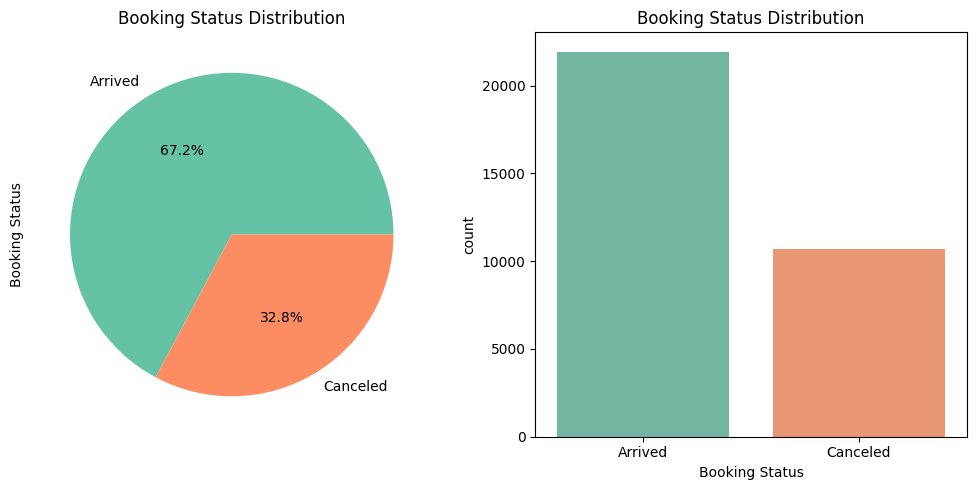

In [9]:
# Define the color palette
colors = sns.color_palette('Set2')

# Create a figure with two subplots side by side
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot a pie chart on the first subplot
vs_booking['Booking Status'].value_counts().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', colors=colors)
axs[0].set_title('Booking Status Distribution')

# Plot a bar chart on the second subplot
sns.countplot(x='Booking Status', data=vs_booking, palette=colors, ax=axs[1], order=['Arrived', 'Canceled'])
axs[1].set_title('Booking Status Distribution')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [10]:
vs_booking.columns

Index(['RoomType', 'Adults', 'Children', 'Breakfast',
       'Number of Special Requests', 'Airport Pickup', 'Weekend Nights',
       'Weeknights', 'Loyalty Points', 'Lead time in days', 'Booking Type',
       'Existing Customer', 'Previous Cancellations', 'Average Room Price',
       'Booking Status'],
      dtype='object')

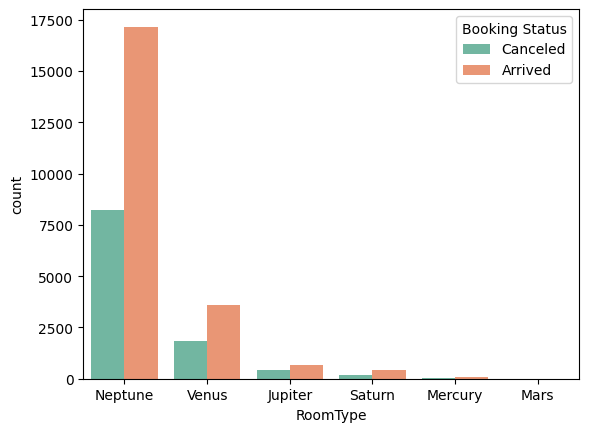

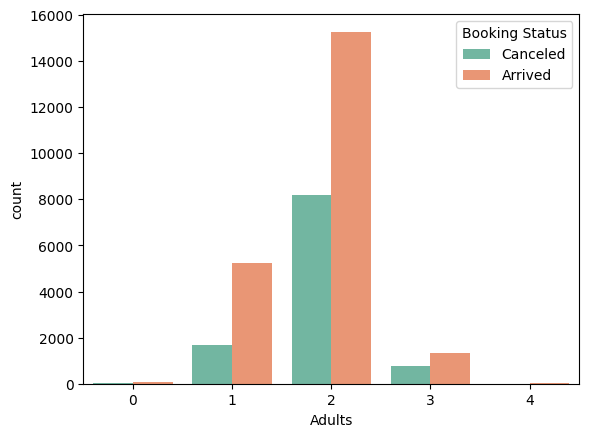

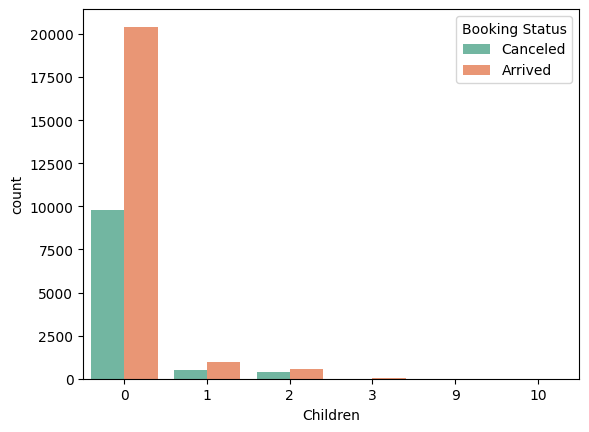

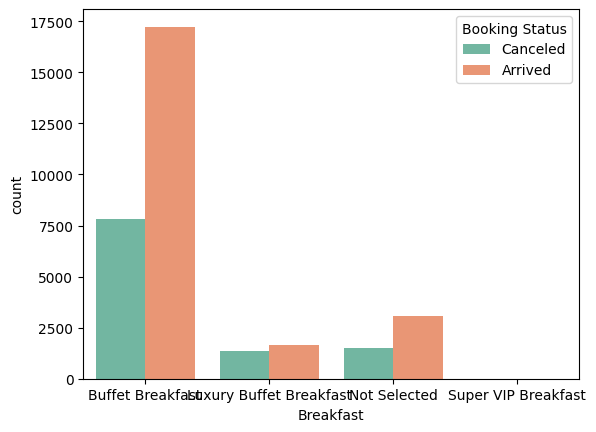

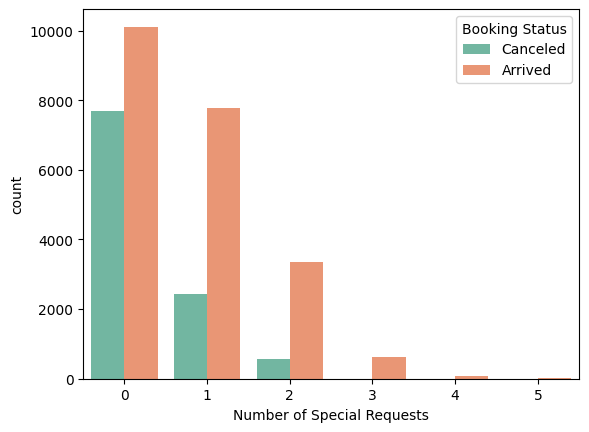

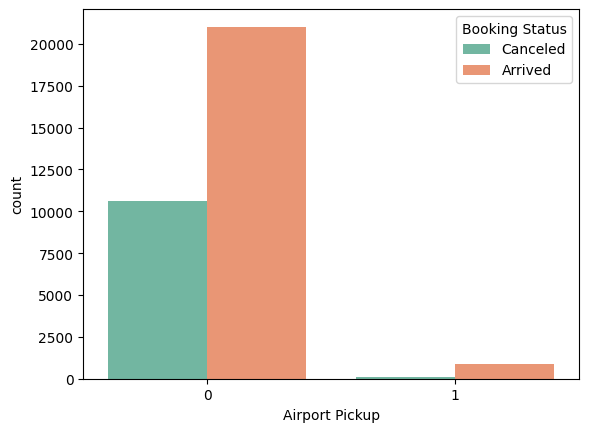

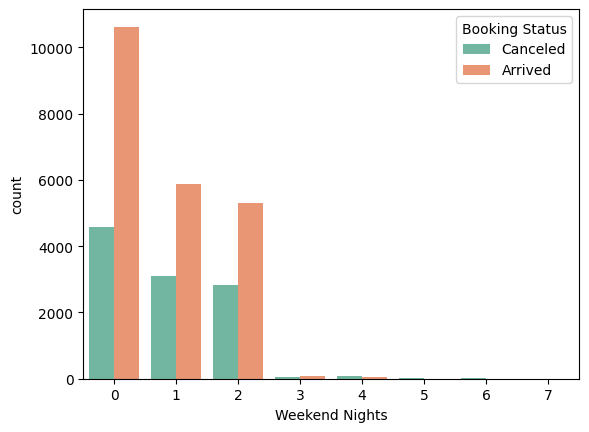

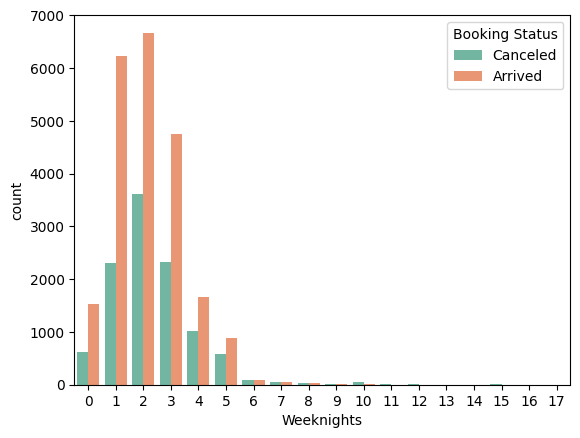

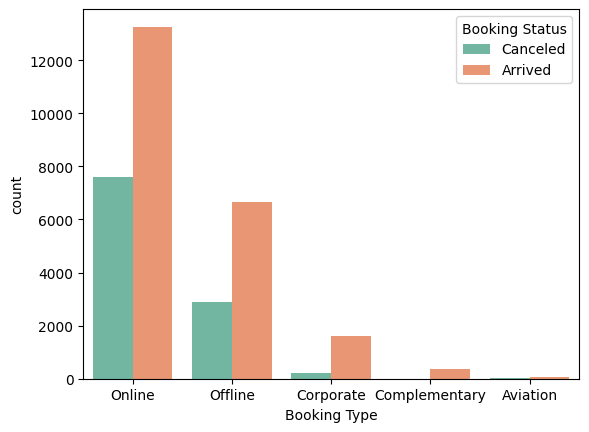

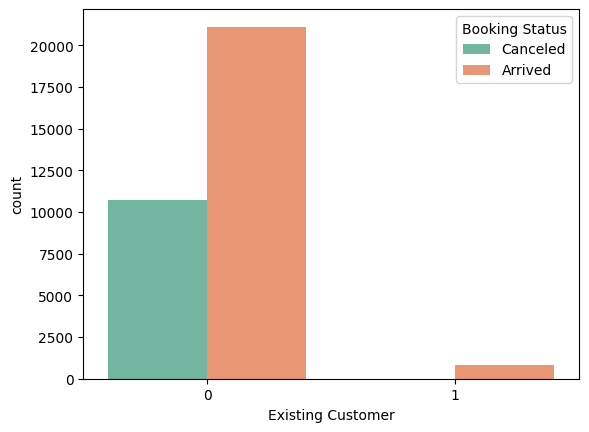

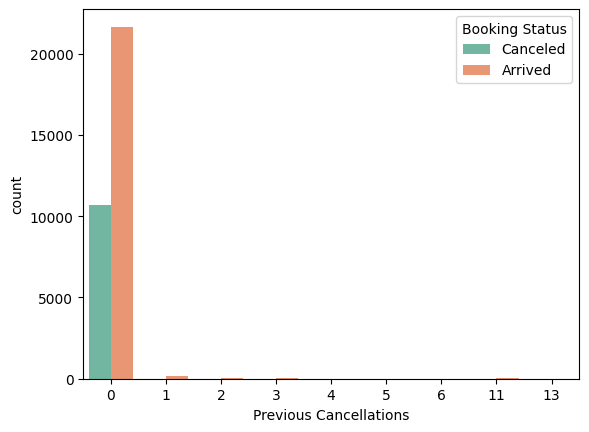

In [11]:
col = ['RoomType', 'Adults', 'Children', 'Breakfast',
       'Number of Special Requests', 'Airport Pickup', 'Weekend Nights',
       'Weeknights', 'Booking Type',
       'Existing Customer', 'Previous Cancellations']

for c in col:
  sns.countplot(x = c, data = vs_booking, palette = 'Set2', hue = 'Booking Status')
  plt.show()

In [12]:
#Encoding all variables
le = LabelEncoder()

vs_booking1 = vs_booking.copy(deep = True)
text_data_features = [i for i in list(vs_booking.columns) if i not in list(vs_booking.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    vs_booking1[i] = le.fit_transform(vs_booking1[i])
    print(i,' : ',vs_booking1[i].unique(),' = ',le.inverse_transform(vs_booking1[i].unique()))

Label Encoder Transformation
RoomType  :  [3 5 0 4 2 1]  =  ['Neptune' 'Venus' 'Jupiter' 'Saturn' 'Mercury' 'Mars']
Breakfast  :  [0 1 2 3]  =  ['Buffet Breakfast' 'Luxury Buffet Breakfast' 'Not Selected'
 'Super VIP Breakfast']
Booking Type  :  [4 3 2 1 0]  =  ['Online' 'Offline' 'Corporate' 'Complementary' 'Aviation']
Booking Status  :  [1 0]  =  ['Canceled' 'Arrived']


In [13]:
#View new data
vs_booking1.head(5)

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status
0,3,2,0,0,1,0,1,3,0,219,4,0,0,102.85,1
1,5,2,0,0,1,0,2,2,0,23,4,0,0,133.55,0
2,3,2,0,0,1,0,2,3,0,303,3,0,0,78.00,0
3,5,2,0,0,0,0,1,2,0,133,4,0,0,113.60,1
4,3,1,0,0,0,0,0,2,0,70,4,0,0,121.50,1


# Feature Selection

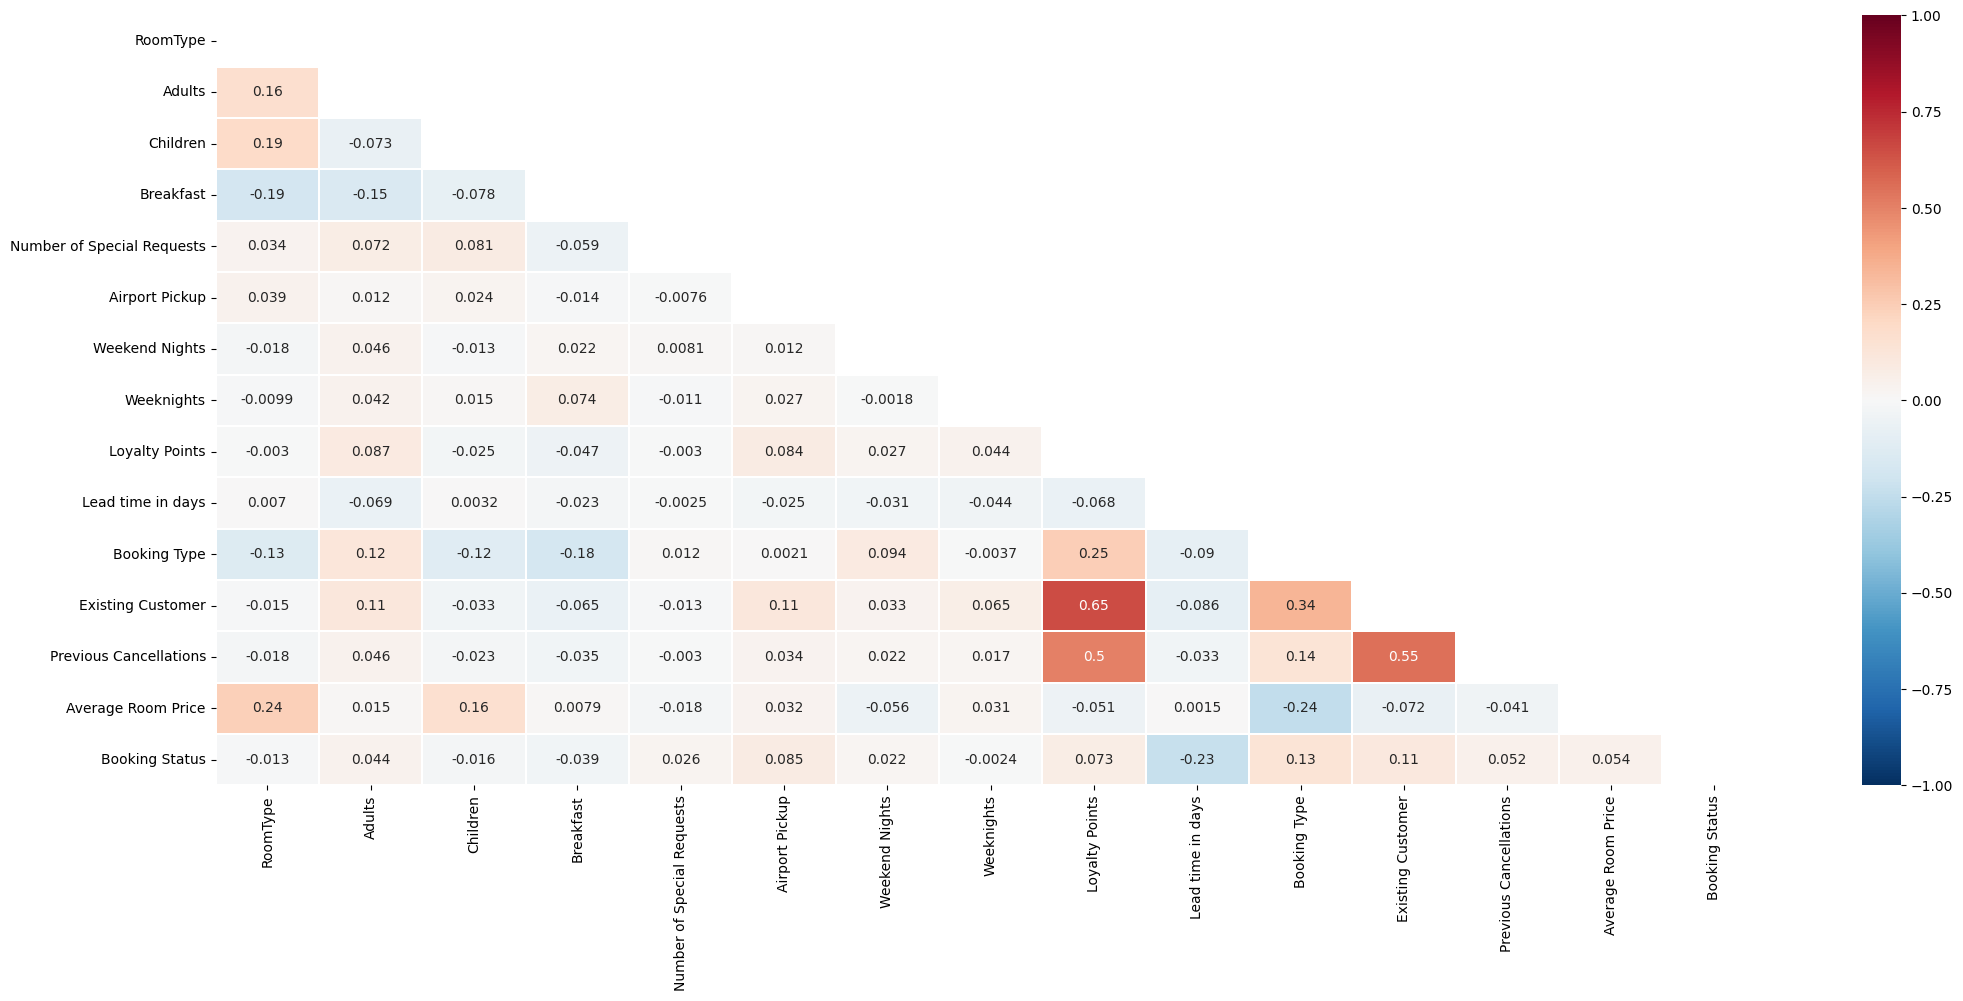

In [14]:
# compute the correlation matrix
plt.figure(figsize=(25, 10))

correlation = vs_booking1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

ax = sns.heatmap(correlation, mask=mask, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, linewidths=.2, cmap='RdBu_r', vmin=-1, vmax=1)

In [15]:
# Split the dataset into features (X) and target variable (y)
X = vs_booking1.drop('Booking Status', axis=1) # Features
y = vs_booking1['Booking Status'] # Target variable


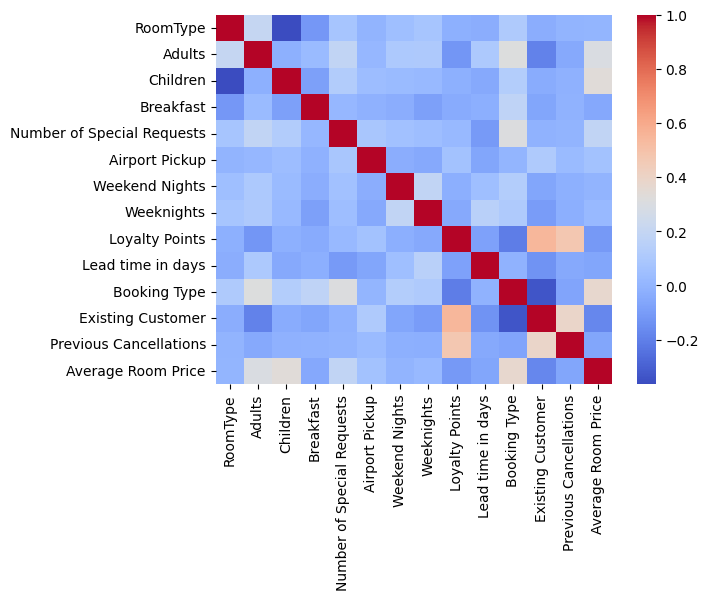

In [16]:
# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)


# Compute the correlation matrix
corr_matrix = pd.DataFrame(X).corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [17]:
#Using Decision tree to determine features for selection
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 15, criterion = 'entropy', max_depth =10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [18]:
#Feature Importance
fi_column = []
fi = []
for i, column in enumerate(X):
  print('The feature importance for{} is: {}'.format(column, dt.feature_importances_[i]))

  fi_column.append(column)
  fi.append(dt.feature_importances_[i])

The feature importance forRoomType is: 0.005983608095206233
The feature importance forAdults is: 0.02073892772599909
The feature importance forChildren is: 0.0014767140203694074
The feature importance forBreakfast is: 0.012785889689391287
The feature importance forNumber of Special Requests is: 0.12475640702111744
The feature importance forAirport Pickup is: 0.01345742741821272
The feature importance forWeekend Nights is: 0.03037780308650698
The feature importance forWeeknights is: 0.0363223865643471
The feature importance forLoyalty Points is: 0.0002417713171380814
The feature importance forLead time in days is: 0.40258015050935564
The feature importance forBooking Type is: 0.1564644052780604
The feature importance forExisting Customer is: 0.0018497660948330625
The feature importance forPrevious Cancellations is: 0.0
The feature importance forAverage Room Price is: 0.19296474317946238


In [19]:
fi_df = zip(fi_column,fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])
fi_df

,Feature,Feature Importance
0,RoomType,0.005984
1,Adults,0.020739
2,Children,0.001477
3,Breakfast,0.012786
4,Number of Special Requests,0.124756
5,Airport Pickup,0.013457
6,Weekend Nights,0.030378
7,Weeknights,0.036322
8,Loyalty Points,0.000242
9,Lead time in days,0.402580


In [20]:
#See feature ranking
fi_rank = fi_df.sort_values(by="Feature Importance", ascending=False)
fi_rank

,Feature,Feature Importance
9,Lead time in days,0.402580
13,Average Room Price,0.192965
10,Booking Type,0.156464
4,Number of Special Requests,0.124756
7,Weeknights,0.036322
6,Weekend Nights,0.030378
1,Adults,0.020739
5,Airport Pickup,0.013457
3,Breakfast,0.012786
0,RoomType,0.005984


In [21]:
#Sorting the features based on importance
fi_df = fi_df.drop(12)
fi_df

,Feature,Feature Importance
0,RoomType,0.005984
1,Adults,0.020739
2,Children,0.001477
3,Breakfast,0.012786
4,Number of Special Requests,0.124756
5,Airport Pickup,0.013457
6,Weekend Nights,0.030378
7,Weeknights,0.036322
8,Loyalty Points,0.000242
9,Lead time in days,0.402580


In [22]:
#Dropping non contributing Featues
contributing_features = fi_df['Feature']


In [23]:
contributing_features

0                       RoomType
1                         Adults
2                       Children
3                      Breakfast
4     Number of Special Requests
5                 Airport Pickup
6                 Weekend Nights
7                     Weeknights
8                 Loyalty Points
9              Lead time in days
10                  Booking Type
11             Existing Customer
13            Average Room Price
Name: Feature, dtype: object

# Splitting Data

In [24]:
X = X[contributing_features]
X
y = y
y

0        1
1        0
2        0
3        1
4        1
        ..
32642    1
32643    1
32644    0
32645    0
32646    0
Name: Booking Status, Length: 32647, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26117, 13)
(26117,)
(6530, 13)
(6530,)


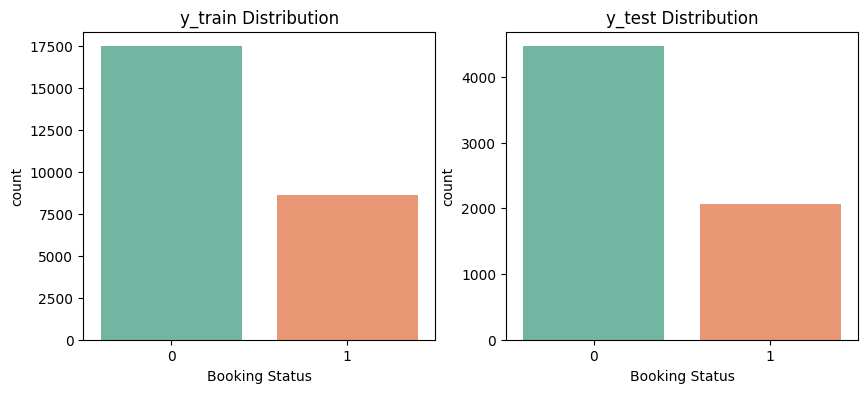

In [26]:
# plot the distribution of y_train
fig, axs = plt.subplots(ncols=2, figsize=(10,4))

sns.countplot(x=y_train, palette="Set2", ax=axs[0])
axs[0].set_title('y_train Distribution')

# plot the distribution of y_test
sns.countplot(x=y_test, palette="Set2", ax=axs[1])
axs[1].set_title('y_test Distribution')

plt.show()



# Model implementation - Logistic Regression


In [27]:
log_reg = LogisticRegression(random_state = 1)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [28]:
y_pred = log_reg.predict(X_test)

In [29]:
#Predict probability estimates
y_predprob = log_reg.predict_proba(X_test)

In [30]:
y_predprob = y_predprob[:, 1]

In [31]:
y_predprob

array([0.02015468, 0.83334615, 0.00366339, ..., 0.4741995 , 0.78399279,
       0.27880447])

In [32]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Average Room Price,Actual,Predicted
13173,3,2,0,0,3,0,0,4,0,88,4,0,105.40,0,0
26294,3,1,0,1,0,0,0,2,0,273,3,0,87.00,0,1
31708,3,1,0,0,1,0,2,0,1,11,4,1,66.99,0,0
4474,3,2,0,0,1,0,0,3,0,10,4,0,117.67,0,0
16020,5,2,0,0,2,0,1,1,0,1,4,0,155.54,0,0
3004,3,1,0,0,0,0,0,2,0,14,3,0,100.00,0,0
16157,3,2,0,2,1,0,0,2,0,79,4,0,116.10,0,0
23863,3,2,0,0,0,0,2,4,0,96,4,0,99.45,1,1
29203,3,2,0,2,0,0,1,2,0,121,4,0,116.10,0,1
7739,3,1,0,0,0,0,1,1,0,118,3,0,110.00,0,0


#Evaluating the Model - Logistic Regression

In [33]:
#Accuracy on Test
log_reg.score(X_test, y_test)

0.8010719754977029

In [34]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4464
           1       0.72      0.61      0.66      2066

    accuracy                           0.80      6530
   macro avg       0.77      0.75      0.76      6530
weighted avg       0.80      0.80      0.80      6530



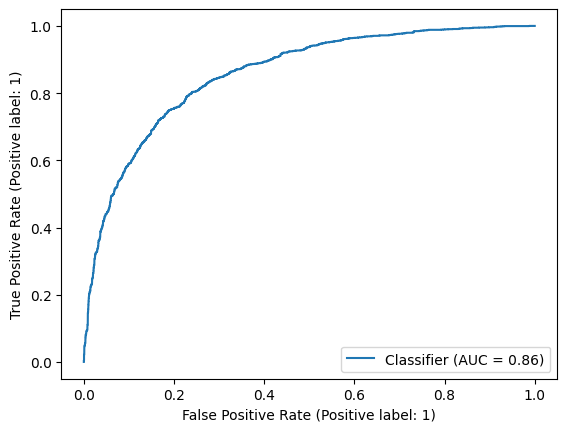

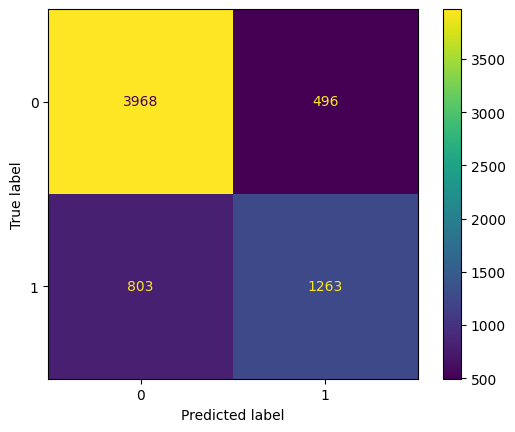

In [35]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_predprob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

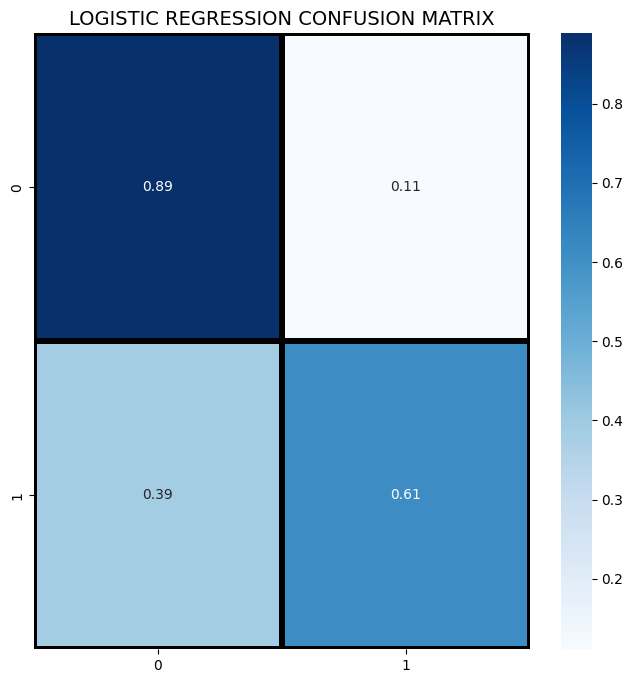

In [36]:
# Normalize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_cm, annot=True, fmt='.2f', cmap='Blues', linecolor='k', linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

#Model Application - Decision Tree

In [37]:
dtmodel = dt.fit(X_train, y_train)
dtmodel

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [38]:
y_pred1 = dtmodel.predict(X_test)

In [39]:
#get predicted probabilities for the main class
y_predprob1 = dtmodel.predict_proba(X_test)

In [40]:
y_predprob1 = y_predprob1[:, 1]
y_predprob1

array([0.        , 0.03954802, 0.25694444, ..., 1.        , 0.64285714,
       0.26666667])

In [41]:
#join unseen y_test with predicted value into a data frame
insp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1})

#join X_test with the new dataframe
insp=pd.concat([X_test,insp], axis=1)

insp.head(10)

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Average Room Price,Actual,Predicted
13173,3,2,0,0,3,0,0,4,0,88,4,0,105.40,0,0
26294,3,1,0,1,0,0,0,2,0,273,3,0,87.00,0,0
31708,3,1,0,0,1,0,2,0,1,11,4,1,66.99,0,0
4474,3,2,0,0,1,0,0,3,0,10,4,0,117.67,0,0
16020,5,2,0,0,2,0,1,1,0,1,4,0,155.54,0,0
3004,3,1,0,0,0,0,0,2,0,14,3,0,100.00,0,0
16157,3,2,0,2,1,0,0,2,0,79,4,0,116.10,0,0
23863,3,2,0,0,0,0,2,4,0,96,4,0,99.45,1,0
29203,3,2,0,2,0,0,1,2,0,121,4,0,116.10,0,1
7739,3,1,0,0,0,0,1,1,0,118,3,0,110.00,0,0


#Model Evaluation - Decision Tree

In [42]:
#Accuracy on Test
dtmodel.score(X_test, y_test)

0.8655436447166922

In [43]:
#print classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4464
           1       0.82      0.73      0.78      2066

    accuracy                           0.87      6530
   macro avg       0.85      0.83      0.84      6530
weighted avg       0.86      0.87      0.86      6530



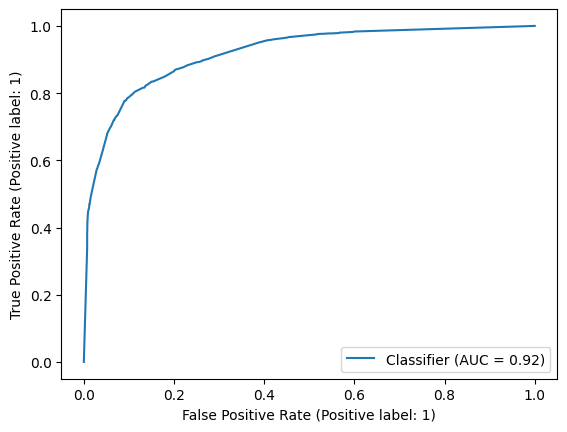

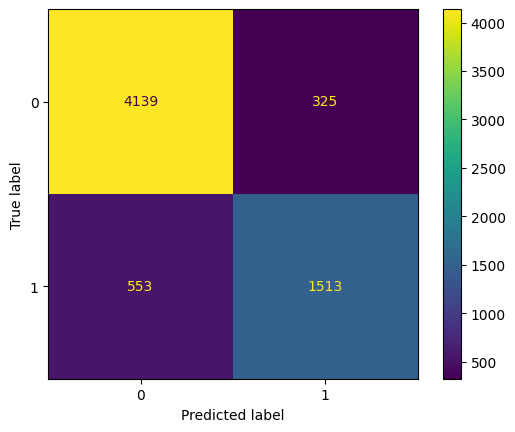

In [44]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_predprob1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

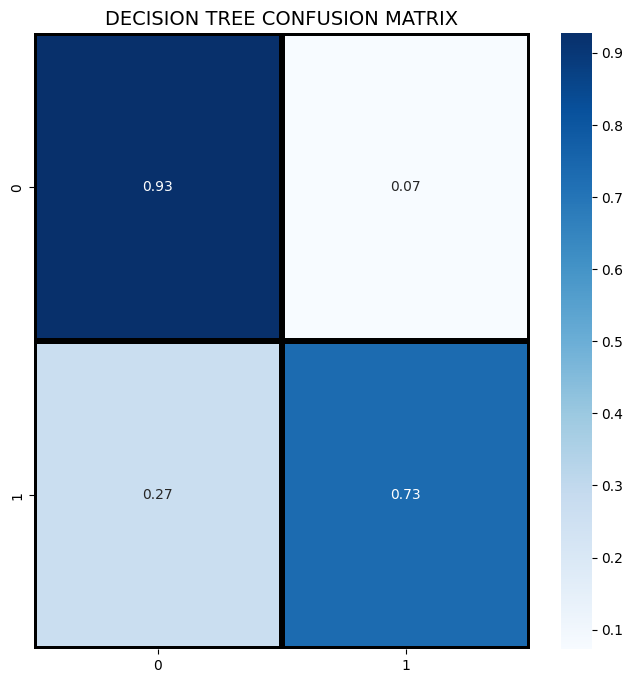

In [45]:
# Normalize the confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
normalized_cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,8))
sns.heatmap(normalized_cm1, annot=True, fmt='.2f', cmap='Blues', linecolor='k', linewidths=3)

plt.title("DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

#Make Predictions using DT model

In [46]:
#Loading the VS_Booking_deploy data
#load dataset

vs_dep = 'https://raw.githubusercontent.com/ayushpradhananga/Booking-Cancellation_Analysis/main/VS_Booking_deploy.csv?token=GHSAT0AAAAAACJ2F3NJ2ZX5KZBRN2HA4N5UZK44BZQ'
vs_booking_deploy = pd.read_csv(vs_dep)

print('Sample size:', vs_booking_deploy.shape[0])
print('Number of columns:', vs_booking_deploy.shape[1])


Sample size: 3628
Number of columns: 16


In [47]:
#Dropping features removed in vs booking data
vs_booking_deploy = vs_booking_deploy.drop(['Booking_ID','FromDate', 'Previous Cancellations'], axis =1)
vs_booking_deploy

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Average Room Price
0,Neptune,1,0,Buffet Breakfast,0,1,0,1,0,2,Corporate,0,67.00
1,Neptune,2,0,Buffet Breakfast,1,0,1,0,0,13,Offline,0,85.00
2,Neptune,2,0,Buffet Breakfast,1,0,2,2,0,93,Online,0,82.45
3,Neptune,1,0,Buffet Breakfast,0,0,0,2,0,3,Offline,0,95.00
4,Neptune,2,1,Buffet Breakfast,2,0,2,5,0,106,Online,0,106.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,Neptune,2,0,Buffet Breakfast,2,0,1,1,0,52,Online,0,72.76
3624,Neptune,2,0,Buffet Breakfast,0,0,2,2,0,250,Online,0,90.95
3625,Neptune,2,0,Not Selected,0,0,1,1,0,268,Online,0,95.40
3626,Neptune,2,0,Buffet Breakfast,0,0,0,2,0,79,Offline,0,75.00


In [48]:
#Encoding all categorical features to numeric
vs_bookingdeploy = vs_booking_deploy.copy(deep = True)
text_features = [i for i in list(vs_booking_deploy.columns) if i not in list(vs_booking_deploy.describe().columns)]

print('Label Encoder Transformation')
for i in text_features:
    vs_bookingdeploy[i] = le.fit_transform(vs_bookingdeploy[i])
    print(i,' : ',vs_bookingdeploy[i].unique(),' = ',le.inverse_transform(vs_bookingdeploy[i].unique()))

Label Encoder Transformation
RoomType  :  [2 4 0 3 1]  =  ['Neptune' 'Venus' 'Jupiter' 'Saturn' 'Mercury']
Breakfast  :  [0 2 1]  =  ['Buffet Breakfast' 'Not Selected' 'Luxury Buffet Breakfast']
Booking Type  :  [2 3 4 0 1]  =  ['Corporate' 'Offline' 'Online' 'Aviation' 'Complementary']


In [49]:
# Normalize the features using StandardScaler
scaler.fit_transform(vs_bookingdeploy)


array([[-0.33230469, -1.65415678, -0.27730985, ..., -2.27258261,
        -0.16486379, -1.02486599],
       [-0.33230469,  0.30320812, -0.27730985, ..., -0.81665294,
        -0.16486379, -0.50692175],
       [-0.33230469,  0.30320812, -0.27730985, ...,  0.63927673,
        -0.16486379, -0.58029718],
       ...,
       [-0.33230469,  0.30320812, -0.27730985, ...,  0.63927673,
        -0.16486379, -0.20766507],
       [-0.33230469,  0.30320812, -0.27730985, ..., -0.81665294,
        -0.16486379, -0.79466855],
       [-0.33230469,  0.30320812, -0.27730985, ..., -0.81665294,
        -0.16486379, -0.03213953]])

In [50]:
vs_bookingdeploy

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Average Room Price
0,2,1,0,0,0,1,0,1,0,2,2,0,67.00
1,2,2,0,0,1,0,1,0,0,13,3,0,85.00
2,2,2,0,0,1,0,2,2,0,93,4,0,82.45
3,2,1,0,0,0,0,0,2,0,3,3,0,95.00
4,2,2,1,0,2,0,2,5,0,106,4,0,106.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,2,2,0,0,2,0,1,1,0,52,4,0,72.76
3624,2,2,0,0,0,0,2,2,0,250,4,0,90.95
3625,2,2,0,2,0,0,1,1,0,268,4,0,95.40
3626,2,2,0,0,0,0,0,2,0,79,3,0,75.00


In [51]:
vs_bookingdeploy.isna().sum()

RoomType                      0
Adults                        0
Children                      0
Breakfast                     0
Number of Special Requests    0
Airport Pickup                0
Weekend Nights                0
Weeknights                    0
Loyalty Points                0
Lead time in days             0
Booking Type                  0
Existing Customer             0
Average Room Price            0
dtype: int64

In [52]:
vs_deploy_pred = dtmodel.predict(vs_bookingdeploy)
vs_deploy_pred

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
#join unseen y_test with predicted value into a data frame
joindf=pd.DataFrame({'Predicted':vs_deploy_pred})

#join X_test with the new dataframe
joindf=pd.concat([vs_bookingdeploy,joindf], axis=1)

joindf.head(20)

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Average Room Price,Predicted
0,2,1,0,0,0,1,0,1,0,2,2,0,67.00,0
1,2,2,0,0,1,0,1,0,0,13,3,0,85.00,0
2,2,2,0,0,1,0,2,2,0,93,4,0,82.45,0
3,2,1,0,0,0,0,0,2,0,3,3,0,95.00,0
4,2,2,1,0,2,0,2,5,0,106,4,0,106.75,0
5,2,2,0,2,1,0,1,1,0,21,4,0,72.42,0
6,2,2,0,0,0,0,0,3,0,164,4,0,76.46,1
7,2,2,0,0,0,0,1,2,0,192,3,0,68.23,0
8,4,2,0,0,0,0,0,3,0,134,4,0,109.80,1
9,4,2,0,0,0,0,0,4,0,117,4,0,99.45,0
